In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression   #for creating datasets

In [3]:
bias = 100
X, y, coef = make_regression(n_features = 1, bias = bias, random_state = 42, coef = True)   #coef = True means we return true
print(X.shape, y.shape)

(100, 1) (100,)


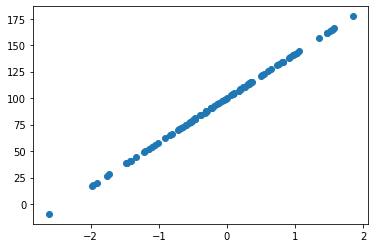

In [4]:
plt.scatter(X, y)  #linear data as we did not provide any noise.

In [5]:
bias = 100   #c in y=m*x+c
X, y, coef = make_regression(n_features = 1, noise = 10, bias = bias, random_state = 42, coef = True)   #coef = True means we return true
print(X.shape, y.shape)

(100, 1) (100,)


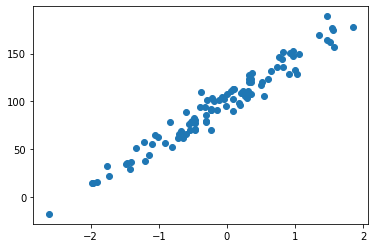

In [6]:
plt.scatter(X, y)   #here noise is added.

In [8]:
coef, bias  #bias added by us is 100. coef = m and bias = c from sklearn.

(array(41.74110031), 100)

In [9]:
y_gen = X * coef + bias  #equation of line.

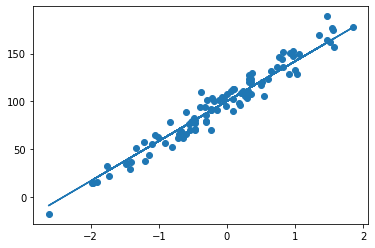

In [10]:
plt.scatter(X, y)
plt.plot(X, y_gen)

In [11]:
#lets plot a line using linear regression
from sklearn.linear_model import LinearRegression

In [12]:
model = LinearRegression()

In [13]:
model.fit(X, y)  #work is dne during training , finding m and c.

LinearRegression()

In [14]:
model.coef_, model.intercept_   #_ means that this value is created after running the function. It is only geneerated after the fit function is called

(array([44.43716999]), 101.16511532052698)

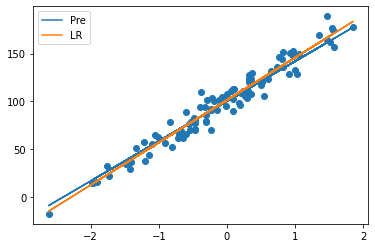

In [15]:
#PLotting both plots.
plt.scatter(X, y)
plt.plot(X, y_gen, label = "Pre")   #Pre plot
plt.plot(X, model.predict(X), label = "LR")   #Linear Regression
plt.legend()

In [16]:
import random

In [25]:
class LinearRegressionCustom:
    
    #constructor
    def __init__(self, lr = 0.1):
        self.lr = lr
      
    #training function i.e fit
    def fit(self, X, y):
        self._X = X   #mock behaviour like private
        self._y = y.reshape(-1, 1)  #1 means 1 column and -1 means any number of rows we can have. This is done to do calculations.
        
        #we need to figure out the value of coef and intercept
        #step1: pick values of m and c at random
        self.coef_ = np.random.random()
        self.intercept_ = np.random.random()
        
        #gradient descent
        errors = []
        
        #lets say we do this 50 times
        for i in range(50):
            self.gradient_descent()  #afeter running this values of m and c changes
            errors.append(self.error())
            
        return errors
    
    #gradient descent
    def gradient_descent(self):
        #change in coef and intercept
        delta_coef , delta_intercept = self.gradient()
        self.coef_ -= delta_coef * self.lr
        self.intercept_ -= delta_intercept * self.lr
      
    def gradient(self):
        yh = self.predict(self._X)  #y hpothesis from predict function
        
        delta_coef = ((yh - self._y ) * self._X).mean()
        
        delta_intercept = (yh - self._y).mean()
        
        return delta_coef,  delta_intercept
    
    def predict(self, X):
        return X * self.coef_ + self.intercept_
    
    def error(self):
        return ((self.predict(self._X) - self._y) ** 2).sum()

In [26]:
model1 = LinearRegressionCustom(lr = 0.1)

In [27]:
error = model1.fit(X, y)

In [28]:
model1.coef_, model1.intercept_

(43.25546029343936, 100.29625821050243)

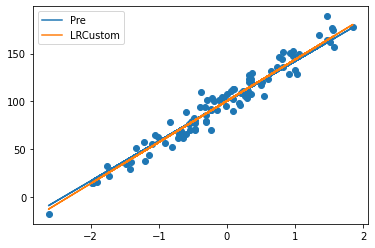

In [30]:
plt.scatter(X, y)
plt.plot(X, y_gen, label = "Pre")
plt.plot(X, model1.predict(X), label="LRCustom")
plt.legend()

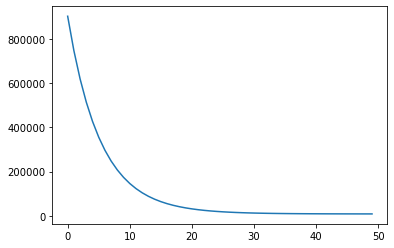

In [32]:
#plotting errors
plt.plot(error)  

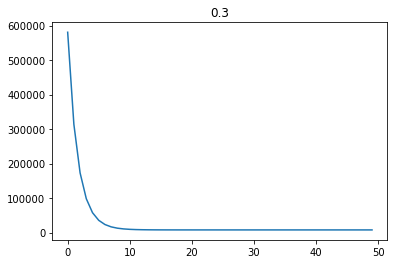

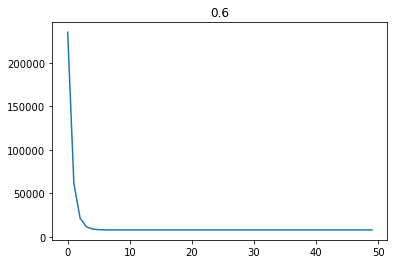

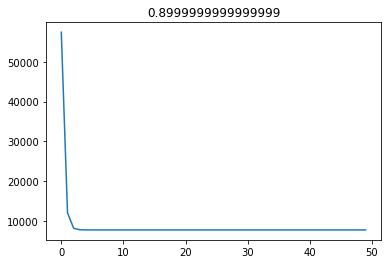

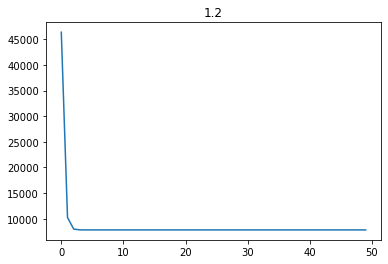

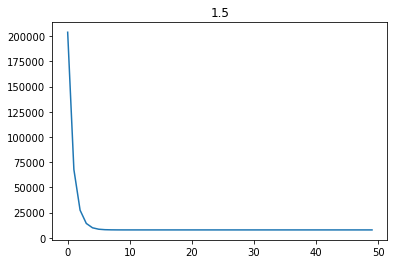

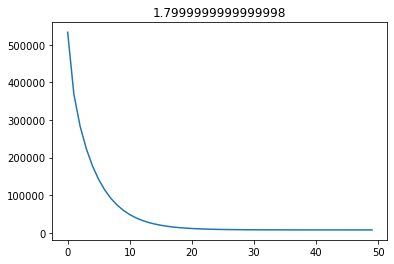

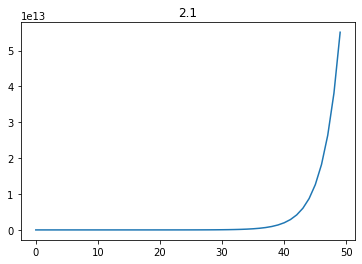

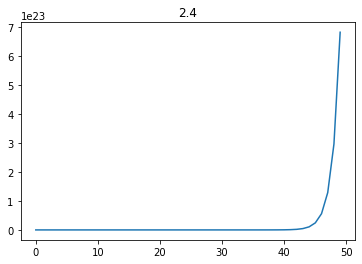

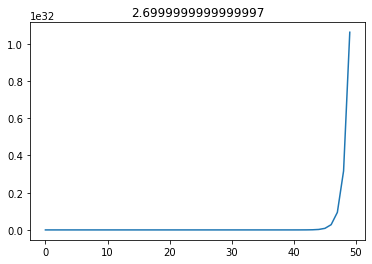

In [41]:
#How to figure out best value of lr?
for i in range(1, 10):
    model = LinearRegressionCustom(lr = 0.3* i)
    errors = model.fit(X, y)
    
    plt.figure()
    plt.title(str(0.3 * i))
    plt.plot(errors)